In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import signal
plt.rcParams['pdf.fonttype'] = 42

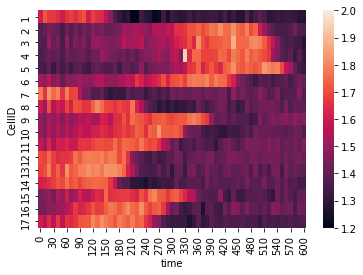

In [18]:
data = pd.read_csv('HS306-s1-tracking.csv')
data['ratio'] = data[' AverageBrightness(Seg)_C1']/ data[' AverageBrightness(Seg)_C0']
data['time'] = data[' ImgNo']*10
data_p = pd.DataFrame(data.loc[:,'time'].values, columns=['time'])
data_p['ratio'] = data['ratio'] 
data_p['CellID'] = data['CellID'] 
data_ratio = data_p.pivot(index='CellID', columns='time', values='ratio')
arr_ratio = data_ratio.values
sns.heatmap(data_ratio, vmin=1.2, vmax=2.0)
plt.show()

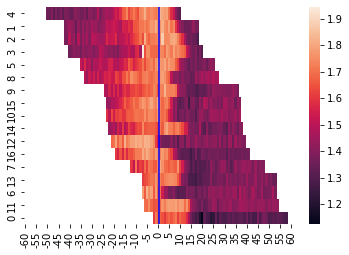

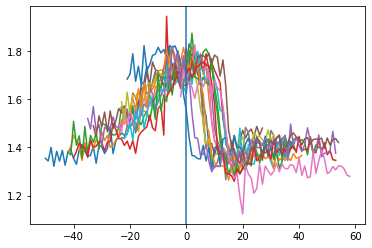

In [38]:
## aligned at Atb2 onset
onset =  [[2], [42], [42],[40], [50], [35],[7], [12], [33],[24],[23], [6], [21],[7], [22], [23],[19]]
offset = 60

arr_WT_aligned = []
for cell in range(arr_ratio.shape[0]):
    if len(onset[cell]) == 1:
        new = np.insert(arr_ratio[cell], 0, np.full(offset-int(onset[cell][0]),np.nan))
        new = np.hstack([new, np.full(int(onset[cell][0]),np.nan)])
        arr_WT_aligned.append(new)

arr_WT_aligned = pd.DataFrame(arr_WT_aligned)
arr_WT_aligned['Num_nan'] = arr_WT_aligned.iloc[:,:60].isnull().values.sum(axis=1)
arr_WT_aligned = arr_WT_aligned.sort_values('Num_nan') 
arr_WT_aligned.columns = np.arange(-60, 62, 1)
sns.heatmap(arr_WT_aligned.iloc[:,:-1])
plt.axvline(61,color='blue')
plt.show()

plt.plot(arr_WT_aligned.iloc[:,:-1].T)
plt.axvline(0)
plt.show()

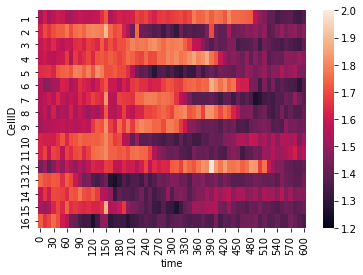

In [14]:
data = pd.read_csv('HS307-s1-tracking.csv')
data['ratio'] = data[' AverageBrightness(Seg)_C1']/ data[' AverageBrightness(Seg)_C0']
data['time'] = data[' ImgNo']*10
data_p = pd.DataFrame(data.loc[:,'time'].values, columns=['time'])
data_p['ratio'] = data['ratio'] 
data_p['CellID'] = data['CellID'] 
sns.heatmap(data_p.pivot(index='CellID', columns='time', values='ratio'), vmin=1.2, vmax=2.0)
plt.show()

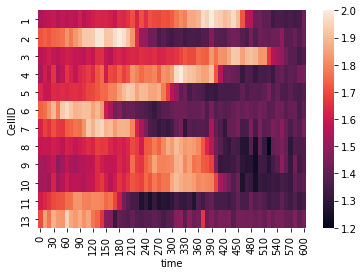

In [15]:
data = pd.read_csv('HS309-s1-tracking.csv')
data['ratio'] = data[' AverageBrightness(Seg)_C1']/ data[' AverageBrightness(Seg)_C0']
data['time'] = data[' ImgNo']*10
data_p = pd.DataFrame(data.loc[:,'time'].values, columns=['time'])
data_p['ratio'] = data['ratio'] 
data_p['CellID'] = data['CellID'] 
sns.heatmap(data_p.pivot(index='CellID', columns='time', values='ratio'), vmin=1.2, vmax=2.0)
plt.show()